# Regresión Logística 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
ruta='/Users/leidygarciaguzman/Documents/DS-Udemy/Datos/datos_seguro.csv'
df = pd.read_csv(ruta)
df.head( )

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


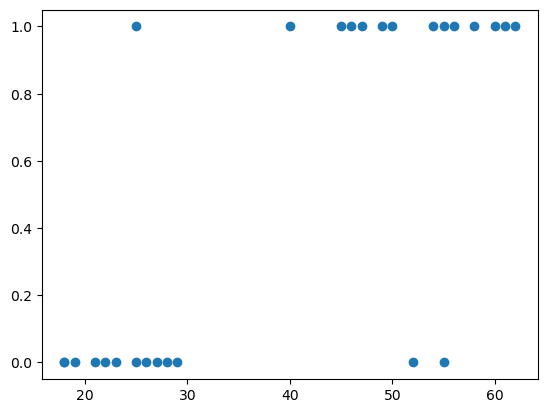

In [3]:
plt.scatter(df.edad, df.compra);

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['edad']], df['compra'], train_size=0.9)

In [9]:
X_train

,edad
26,23
2,47
18,19
4,46
15,55
20,21
23,45
25,54
14,49
19,18


In [10]:
X_test

,edad
5,56
13,29
22,40


In [11]:
modelo = LogisticRegression()

In [12]:
modelo.fit(X_train, y_train)

LogisticRegression()

In [13]:
modelo.score(X_train, y_train) 
#Tiene una probabilidad del 87.5% de acertar

0.875

In [14]:
#Como se comportsn nuevos clientes
datos_nuevos = pd.DataFrame({'edad':[25,35,45,55]})
datos_nuevos

,edad
0,25
1,35
2,45
3,55


In [16]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades
#*Probabilidad de que no compre vs. *Probabilidad de que compre. 

array([[0.86932423, 0.13067577],
       [0.64838761, 0.35161239],
       [0.33825542, 0.66174458],
       [0.12410524, 0.87589476]])

Retorna la probabilidad de que los datos nuevos realicen la compra. Justificación: El método predict_proba retorna las probabilidades de las posibles salidas, donde [:, 1] especifica la probabilidad de la clase positiva, en este caso, que el cliente realice la compra.

In [17]:
prob_compra = probabilidades[:,1]
prob_compra

array([0.13067577, 0.35161239, 0.66174458, 0.87589476])

La gráfica de las probabilidades de compra para nuevos datos representa visualmente cómo cambia la probabilidad estimada de comprar un seguro en función de la edad según lo aprendido por el modelo.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


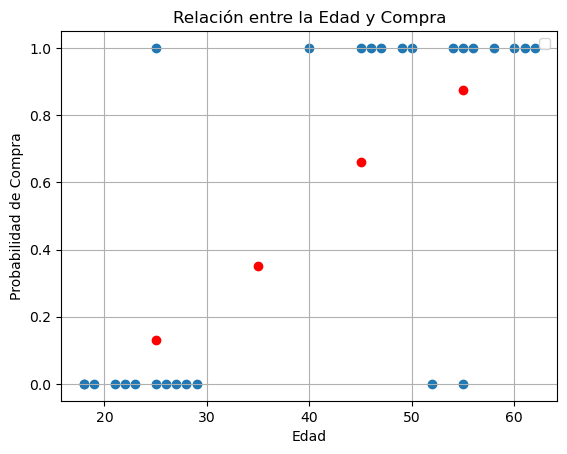

In [19]:
plt.scatter(df.edad, df.compra);
plt.scatter(datos_nuevos['edad'], prob_compra, color='red');

plt.xlabel('Edad')
plt.ylabel('Probabilidad de Compra')
plt.title('Relación entre la Edad y Compra')
plt.grid(True)
plt.legend()

plt.show()

Ejercicio 2

In [21]:
datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(datos)
df

,edad,salario,compra
0,25,50000,0
1,30,54000,0
2,45,72000,1
3,22,42000,0
4,34,62000,1
5,40,68000,1
6,27,49000,0
7,31,56000,0
8,43,76000,1
9,50,90000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


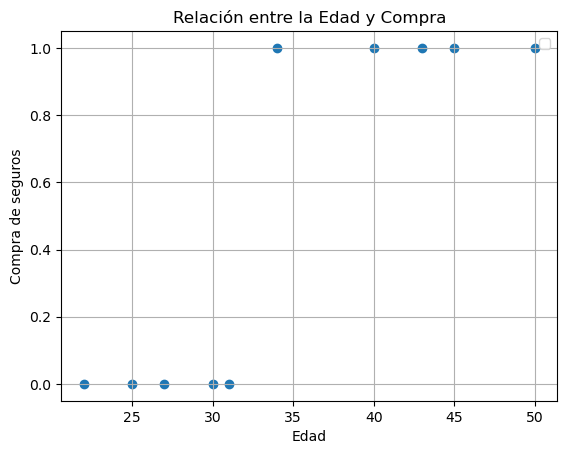

In [23]:
plt.scatter(df.edad, df.compra);

plt.xlabel('Edad')
plt.ylabel('Compra de seguros')
plt.title('Relación entre la Edad y Compra')
plt.grid(True)
plt.legend()

plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 
# Crear un DataFrame de ejemplo con datos de clientes
datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}
 
df = pd.DataFrame(datos)
 

Establecer un random_state proporciona un punto de control para que los resultados sean reproducibles, asegurando que las mismas filas de datos se seleccionen para el entrenamiento y las pruebas cada vez que se ejecute el código.

In [29]:
# Separar las características y la variable objetivo
X = df[['edad']]
y = df['compra']
 
# Dividir los datos en conjuntos de entrenamiento y prueba (90% entrenamiento, 10% prueba)
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.9, random_state=42)


In [30]:
# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_entrena, y_entrena)  # Importante: entrenar el modelo
 

LogisticRegression()

La visualización conjunta permite comparar la efectividad y coherencia de las predicciones del modelo respecto a las tendencias observadas en los datos originales, mostrando cómo se comporta el modelo bajo nuevas circunstancias.

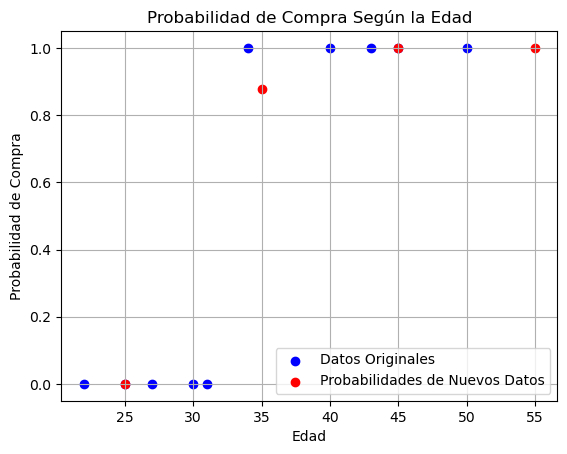

In [31]:
# Crear un nuevo DataFrame con la columna 'edad'
datos_nuevos = pd.DataFrame({
    'edad': [25, 35, 45, 55]
})
 
# Usar el modelo para predecir las probabilidades para el nuevo DataFrame
prob_compra = modelo.predict_proba(datos_nuevos)[:, 1]  # Toma solo la probabilidad de la clase 1 (compra)
 
# Gráfica de los datos originales
plt.scatter(df['edad'], df['compra'], color='blue', label='Datos Originales')
 
# Gráfica de las probabilidades de compra para los nuevos datos
plt.scatter(datos_nuevos['edad'], prob_compra, color='red', label='Probabilidades de Nuevos Datos')
 
# Añadir detalles al gráfico
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Compra')
plt.title('Probabilidad de Compra Según la Edad')
plt.legend()
plt.grid(True)
plt.show()